# Goal

The goal of this project is to use visualization to conduct some useful observations.
This research will look at if there is a direct relationship between a nation's economic performance and its inhabitants' average lifespans.
Some questions to answer:
- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?

# Data

Data sources
- GDP Source: World Bank national accounts data, and OECD National Accounts data files.
- Life expectancy Data Source: World Health Organization

The data for this project is in  all_data.csv.
The dataset provided has the following columns of data:

- Country - nation
- Year - the year for the observation
- Life expectancy at birth (years) - life expectancy value in years
- GDP - Gross Domestic Product in U.S. dollars

# Analysis

## import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# %matplotlib notebook
%matplotlib inline

## load the data

In [3]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
df.shape #return the shape of the dataframe

(96, 4)

## check data cleanliness

In [5]:
df.info() #seems the data is clean when the shape of df is (96,4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [6]:
df.isna().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)
df.shape #there is no duplicate

(96, 4)

In [8]:
#I saw that the column "Life expectancy at birth (years)" is hard to for coding
# change to new name LEABY
df.rename(columns={'Life expectancy at birth (years)': 'LEABY'},inplace=True)
df.columns

Index(['Country', 'Year', 'LEABY', 'GDP'], dtype='object')

## first look at the data

In [9]:
#Now I gonna see what countries and years data are collected in the dataset
df["Country"].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [10]:
df["Year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [11]:
df.describe()
#we can see that the countries that we investigate have a high LEABY on average

,Year,LEABY,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


## Answer the questions

### Has life expectancy increased over time in the six nations?

In [12]:
# df["Year"] = df["Year"].apply(pd.to_datetime)

In [13]:
df["Year"]

0     2000
1     2001
2     2002
3     2003
4     2004
      ... 
91    2011
92    2012
93    2013
94    2014
95    2015
Name: Year, Length: 96, dtype: int64

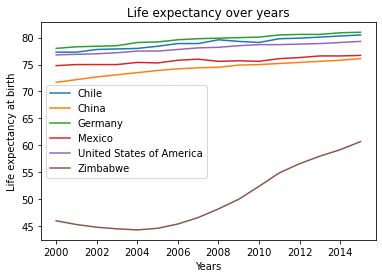

In [14]:
plt.clf()
for nation in df["Country"].unique():
    plt.plot(df[df["Country"]==nation]["Year"],df[df["Country"]==nation]["LEABY"], label=nation)

plt.xlabel("Years")
plt.ylabel("Life expectancy at birth")
plt.legend()
plt.title("Life expectancy over years")
plt.show()

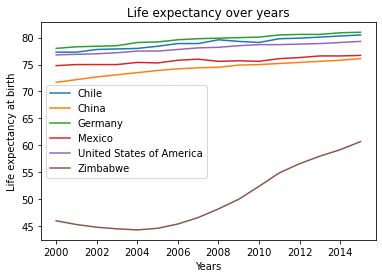

In [15]:
#another way to make the above plot
plt.clf()
sns.lineplot(data= df, x= "Year", y="LEABY", hue="Country")
plt.xlabel("Years")
plt.ylabel("Life expectancy at birth")
plt.legend()
plt.title("Life expectancy over years")
plt.show()

WE can see that there is a trend that the LEABY increase over years in all countries, especially Zimbabwe

Now I will create individual plot for each country.

In [16]:
df[df["Country"]=="Chile"]["LEABY"]

0     77.3
1     77.3
2     77.8
3     77.9
4     78.0
5     78.4
6     78.9
7     78.9
8     79.6
9     79.3
10    79.1
11    79.8
12    79.9
13    80.1
14    80.3
15    80.5
Name: LEABY, dtype: float64

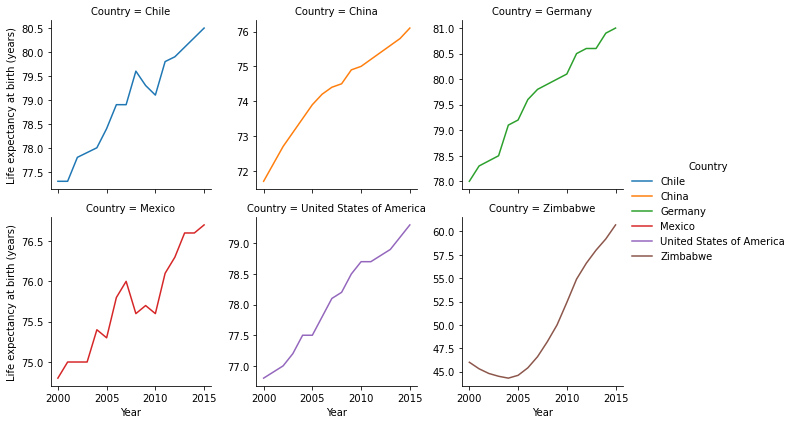

In [17]:
LEABY_facegrid = sns.FacetGrid(df, col="Country", col_wrap=3,
                               hue = "Country", sharey = False)

LEABY_facegrid = (LEABY_facegrid.map(sns.lineplot, "Year", "LEABY")
                  .add_legend()
                  .set_axis_labels("Year","Life expectancy at birth (years)"))

LEABY_facegrid;

We can see that Chile, Mexico and Zimbabwe had lowered LEABY in some years. The linear increase in other countries is not smooth.
Overall, LEABY at each country has increased over years.

### Has life expectancy increased over time in the six nations?

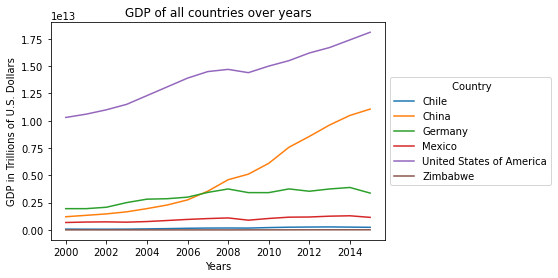

In [18]:
#another way to make the above plot
plt.clf()
sns.lineplot(data= df, x= "Year", y="GDP", hue="Country")
plt.xlabel("Years")
plt.ylabel("GDP in Trillions of U.S. Dollars")
#plt.legend() #this legend make the graph look not nice
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=" Country")
plt.title("GDP of all countries over years")
plt.show()

We can see that only China and US have increased the GDP sharply over years. However, a deeper look should be conducted because all data now is using on the same scale

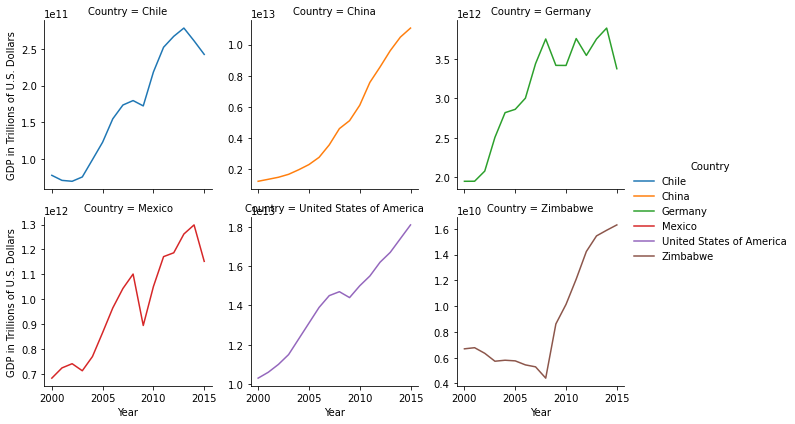

In [19]:
GDP_facegrid = sns.FacetGrid(df, col="Country", col_wrap=3,
                               hue = "Country", sharey = False)

GDP_facegrid = (GDP_facegrid.map(sns.lineplot, "Year", "GDP")
                  .add_legend()
                  .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

GDP_facegrid;

We can see that overall all countries has increased their GDP over years.
Espicially, US and China has increased shaprly. Compared to China and the US, the other country's GDP growth appeared small.
The linear increases of other countries has fluctuated significiantly.

### Is there a correlation between GDP and life expectancy of a country?

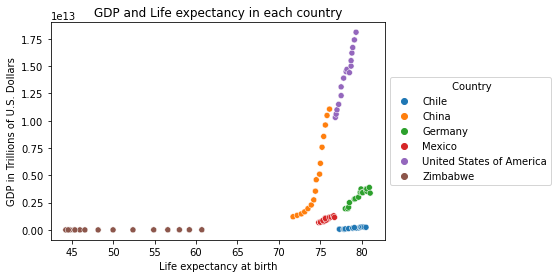

In [20]:
# Scatter plot is a good choice to investigate the relationhip between GDP and LEABY
plt.clf()
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country)
plt.xlabel("Life expectancy at birth")
plt.ylabel("GDP in Trillions of U.S. Dollars")
#plt.legend() #this legend make the graph look not nice
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=" Country")
plt.title("GDP and Life expectancy in each country")
plt.show()

At the first look, we can see that there may be no relationship between GDP and LEABY in Zimbawe and Chile. In other countries, we can notice a positive correlation between LEABY and GDP, especially China and USA

We need to create a plot for each country to have a deeper look.

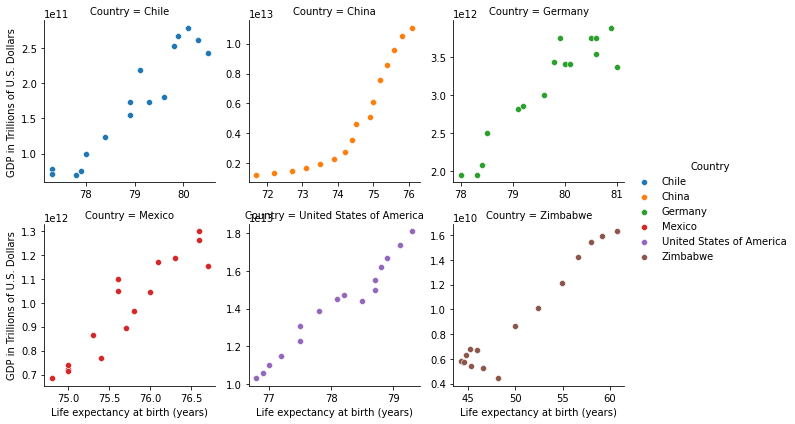

In [21]:
LEABY_GDP = sns.FacetGrid(df, col="Country", col_wrap=3, hue ="Country",  sharey = False, sharex = False)
LEABY_GDP = (LEABY_GDP.map(sns.scatterplot, "LEABY", "GDP") .add_legend()
             .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));
LEABY_GDP

Overall, we can see a positive correlation between LEABY and GDP in all countries.

### What is the average life expectancy in these nations?

In [22]:
df["LEABY"].describe()

count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: LEABY, dtype: float64

The average of LEABY is 72. We can have a deeper look

In [23]:
df.groupby("Country")["LEABY"].mean().reset_index()

,Country,LEABY
0,Chile,78.94375
1,China,74.26250
2,Germany,79.65625
3,Mexico,75.71875
4,United States of America,78.06250
5,Zimbabwe,50.09375


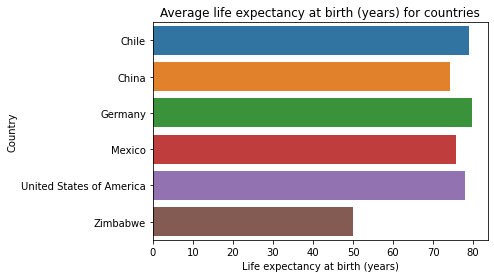

In [24]:
plt.clf()
sns.barplot(x="LEABY", y="Country", data=df, ci=None)
plt.xlabel("Life expectancy at birth (years)")
plt.title("Average life expectancy at birth (years) for countries")
plt.show()

The average LEABY of all countries excepts Zimbabwe is from 70 to 80.

### What is the distribution of that life expectancy?

D:\anaconda\anaconda_2021.11-Install\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


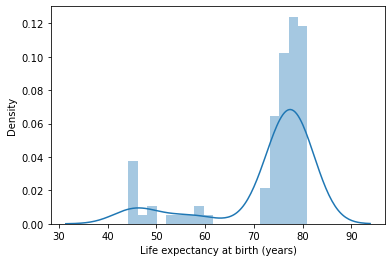

In [25]:
plt.clf()
sns.distplot(df.LEABY)
plt.xlabel("Life expectancy at birth (years)");

The distribution of LEABY in the data is very left skewed

<Figure size 432x288 with 0 Axes>

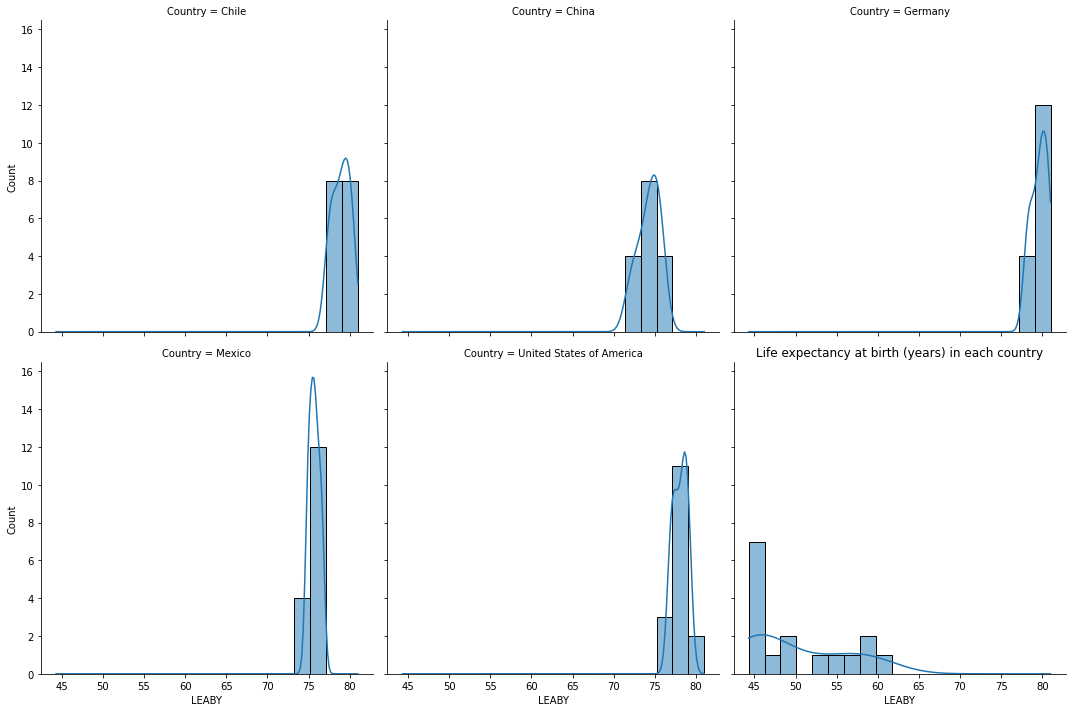

In [26]:
plt.clf()
sns.displot(data=df, x= "LEABY", col="Country", col_wrap=3, kde=True)
plt.title("Life expectancy at birth (years) in each country");
plt.show()

<Figure size 432x288 with 0 Axes>

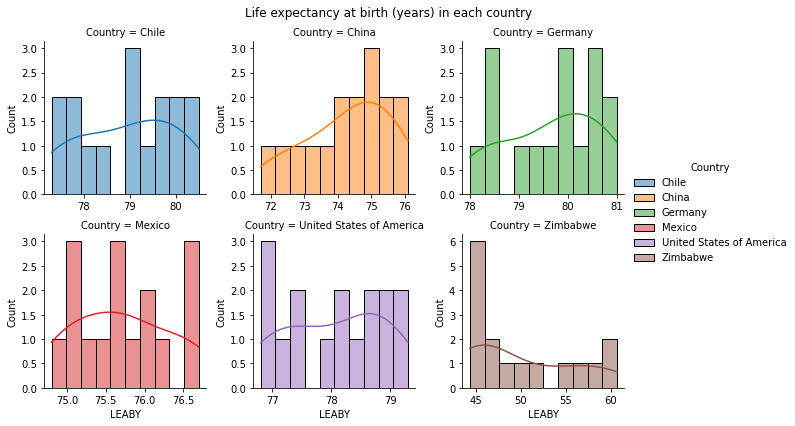

In [27]:
plt.clf()
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.histplot,"LEABY",kde=True, bins=10)
         .add_legend())

graph.fig.subplots_adjust(top=0.9)
graph.fig.suptitle('Life expectancy at birth (years) in each country')
plt.show()

<Figure size 432x288 with 0 Axes>

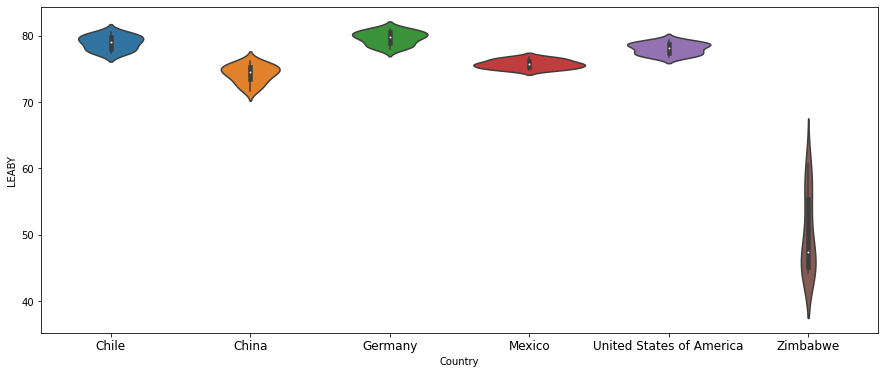

In [33]:
plt.clf()
fig = plt.figure(figsize=(15,6))
sns.violinplot(data=df, x="Country", y="LEABY")
plt.xticks(fontsize= 12)
plt.show()

D:\anaconda\anaconda_2021.11-Install\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 432x288 with 0 Axes>

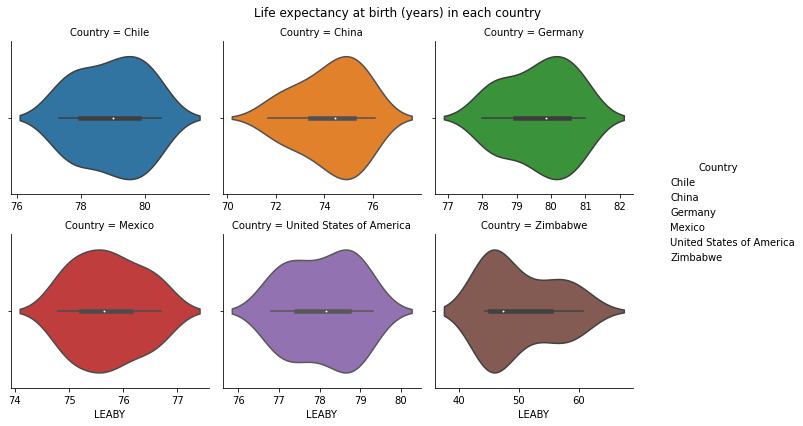

In [29]:
plt.clf()
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.violinplot,"LEABY")
         .add_legend())

graph.fig.subplots_adjust(top=0.9)
graph.fig.suptitle('Life expectancy at birth (years) in each country')
plt.show()

On the plot, China, Germany have left-skewed LEABY distributions, Zimbabwe has a right-skewed LEABY distributions.